In [8]:

import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

from shapely.geometry import box  # To create polygon bounding box

pd.set_option("display.max.columns", None)

# -------------------------------------
# Import and simplify states polygons
states = gpd.read_file(os.path.join('data',
                                    'tl_2022_us_state',
                                    'tl_2022_us_state.shp')
                                    )

# Import Natural Earth populated places points
places = gpd.read_file(os.path.join('data',
                                    'ne_50m_populated_places_simple',
                                    'ne_50m_populated_places_simple.shp')
                                    )

# Import ferry routes lines
roads = gpd.read_file(os.path.join('data',
                                   'ne_10m_roads',
                                   'ne_10m_roads.shp')
                                   )

In [5]:
print(f"CRS: {states.crs}")

states.head(3)

CRS: EPSG:4269


,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


<Axes: >

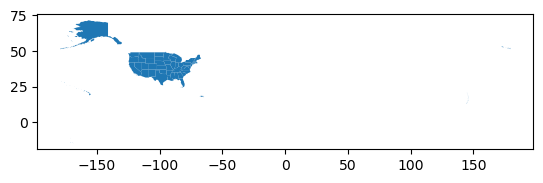

In [6]:
states.plot()


We are only interested in alaska

<Axes: >

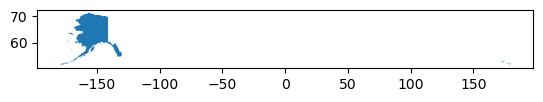

In [9]:
alaska = states[states['NAME'] == 'Alaska']

alaska.plot()


In [12]:
# Reproject 
alaska = alaska.to_crs('epsg:3338')


#Inspect new crs
print('Is this CRS projected? ', alaska.crs.is_projected)
alaska.crs

Is this CRS projected?  True


<Projected CRS: EPSG:3338>
Name: NAD83 / Alaska Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Alaska.
- bounds: (172.42, 51.3, -129.99, 71.4)
Coordinate Operation:
- name: Alaska Albers (meter)
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## Prepare populated places points

explore data


In [19]:
print('CRS: ', places.crs)

places.head()

CRS:  EPSG:4326


,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,capin,worldcity,megacity,sov0name,sov_a3,adm0name,adm0_a3,adm1name,iso_a2,note,latitude,longitude,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
0,10,1,5,Admin-1 region capital,Bombo,None,None,Bombo,0,0,None,0,0,Uganda,UGA,Uganda,UGA,Bamunanika,UG,None,0.583299,32.533300,75000,21000,0.0,8,7,None,None,7.0,1159113923,POINT (32.53330 0.58330)
1,10,1,5,Admin-1 region capital,Fort Portal,None,None,Fort Portal,0,0,None,0,0,Uganda,UGA,Uganda,UGA,Kabarole,UG,None,0.671004,30.275002,42670,42670,0.0,7,7,None,None,7.0,1159113959,POINT (30.27500 0.67100)
2,10,1,3,Admin-1 region capital,Potenza,None,None,Potenza,0,0,None,0,0,Italy,ITA,Italy,ITA,Basilicata,IT,None,40.642002,15.798997,69060,69060,0.0,8,8,None,None,7.0,1159117259,POINT (15.79900 40.64200)
3,10,1,3,Admin-1 region capital,Campobasso,None,None,Campobasso,0,0,None,0,0,Italy,ITA,Italy,ITA,Molise,IT,None,41.562999,14.655997,50762,50762,0.0,8,8,None,None,7.0,1159117283,POINT (14.65600 41.56300)
4,10,1,3,Admin-1 region capital,Aosta,None,None,Aosta,0,0,None,0,0,Italy,ITA,Italy,ITA,Valle d'Aosta,IT,None,45.737001,7.315003,34062,34062,0.0,7,7,None,None,7.0,1159117361,POINT (7.31500 45.73700)


<Axes: >

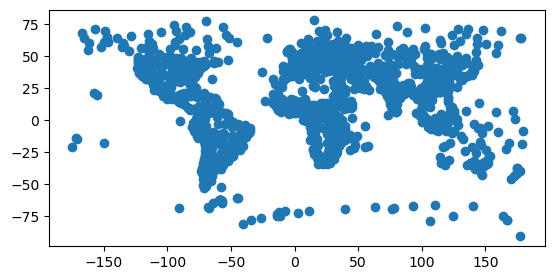

In [20]:
places.plot()


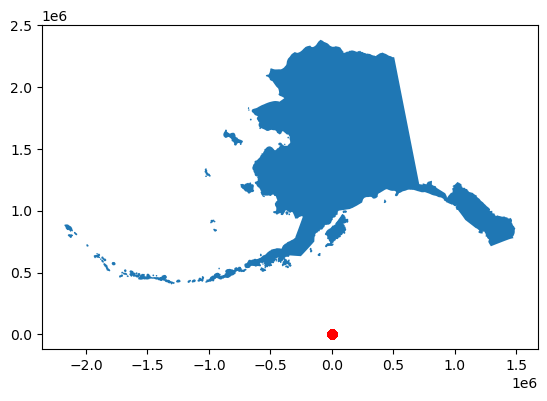

In [21]:
fig, ax = plt.subplots()

alaska.plot(ax=ax) 
places.plot(ax=ax, color = 'red')

plt.show()

**Data in weird places? Check crs**
To plot, analyze, or integrate different geospatial datasets they **must have the same CRS**


In [23]:
alaska.crs == places.crs

False

We need to match crs

In [27]:
places = places.to_crs(alaska.crs)
assert alaska.crs == places.crs

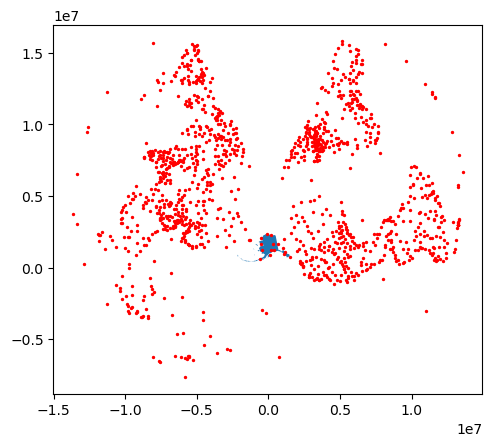

In [30]:
fig, ax = plt.subplots()

alaska.plot(ax=ax)
places.plot(ax=ax, color='red', markersize=2)

plt.show()


## Clipping

** Clippin** use polygons to only select data within polygons 

Syntax:
```
updated_geodf = geopandas.clip(geodf,mask)
```
where: 
`updated_geodf` = intersection of geometries in `geodf` with `mask`
- `mask` = `gpd.GeoDataFrame` with polygons

MAKE SURE CRS MATCH

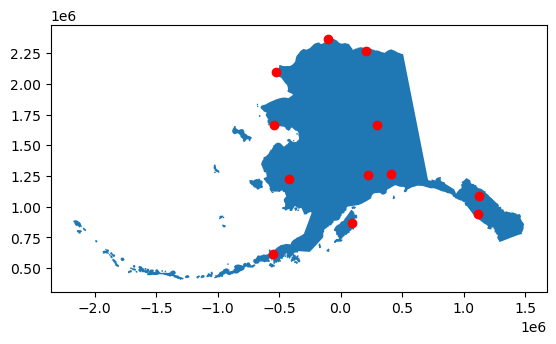

In [31]:
# Clip places with alaska polygon 
ak_places = gpd.clip(places, alaska)

fig, ax = plt.subplots()
alaska.plot(ax=ax)
ak_places.plot(ax=ax, color = 'red')
plt.show()

## Prepare roads

Examine roads dataset

In [32]:
print('CRS:', roads.crs)
roads.head()

CRS: EPSG:4326


,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,question,length_km,toll,ne_part,label,label2,local,localtype,localalt,labelrank,ignore,add,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label,geometry
0,8,Road,Secondary Highway,CAN,None,"Version 1.5: Changed alignment, a few adds in ...",None,None,None,None,0,3,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,314705,North America,0,None,7.1,9.6,"LINESTRING (-133.32533 62.21571, -133.31664 62..."
1,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",83,None,None,None,0,164,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,108105,North America,0,Federal,7.0,8.6,"LINESTRING (-100.50543 42.80753, -100.53495 42..."
2,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",840,None,None,None,0,98,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,0,North America,0,U/C,7.0,9.5,"LINESTRING (-87.27432 36.02439, -87.22916 35.9..."
3,8,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",151,None,None,None,0,17,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,0,North America,0,Federal,7.1,9.6,"LINESTRING (-87.72757 44.15165, -87.57301 44.1..."
4,6,Road,Major Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",GSP,None,None,None,0,33,1,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,311305,North America,1,State,6.0,8.5,"MULTILINESTRING ((-74.75920 39.14301, -74.6735..."


<Axes: >

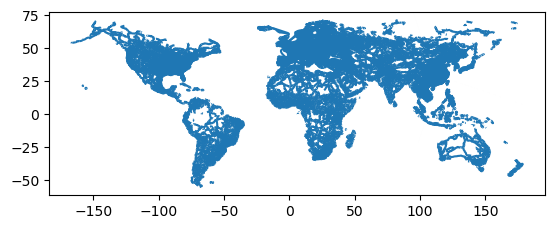

In [33]:
roads.plot()

- Before reprojecting and clipping, we will subset data to only select us_roads

<Axes: >

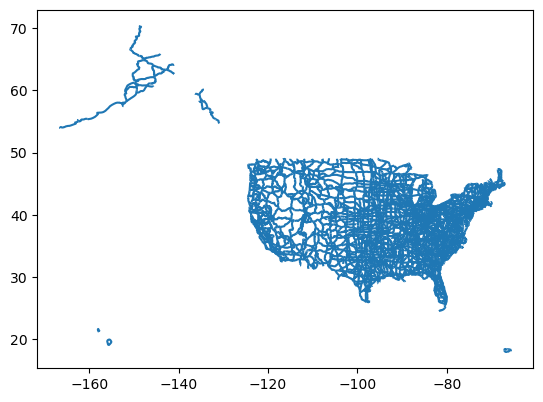

In [41]:
usa_roads = roads[roads['sov_a3']== 'USA']
usa_roads.plot()

In [60]:
# Clup usa_roads to alaska geometry
ak_roads = gpd.clip(usa_roads.to_crs(alaska.crs), alaska)

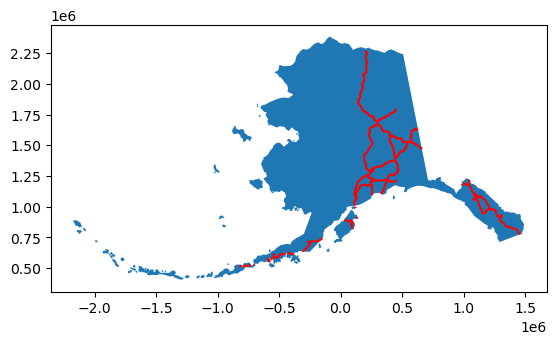

In [44]:

fig, ax = plt.subplots()
alaska.plot(ax=ax)
ak_roads.plot(ax=ax, color='red')
plt.show()

## Instead of using polygon for clipping we use bounding box

We will clip `usa_roads` with **bounding box** of alaska instead of polygons
use `box()` function from `shapely`

`box()` needs 4 values
minx, miny, maxx, maxy

In [47]:
alaska.total_bounds

array([-2175729.73162241,   404545.10791528,  1493082.30904445,
        2383808.43520815])

<class 'shapely.geometry.polygon.Polygon'>


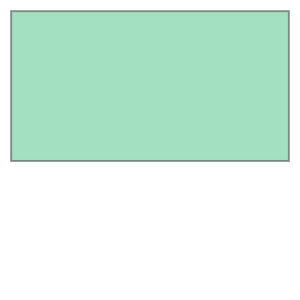

In [50]:
bbox = box(*alaska.total_bounds)
print(type(bbox))
bbox


`*` unpacking operator

'Unpacks' elements in iterables an assigning them one-by-one to the parameters of the function

In [51]:
print(['a', 'b', 'c'])

['a', 'b', 'c']


In [55]:
ak_bbox = gpd.GeoDataFrame( geometry = [bbox],
                           crs = alaska.crs)

In [59]:
ak_complete_roads = gpd.clip(usa_roads.to_crs(alaska.crs), ak_bbox)

Compare clipping methods

Text(0.5, 1.0, 'Clipped with bbox')

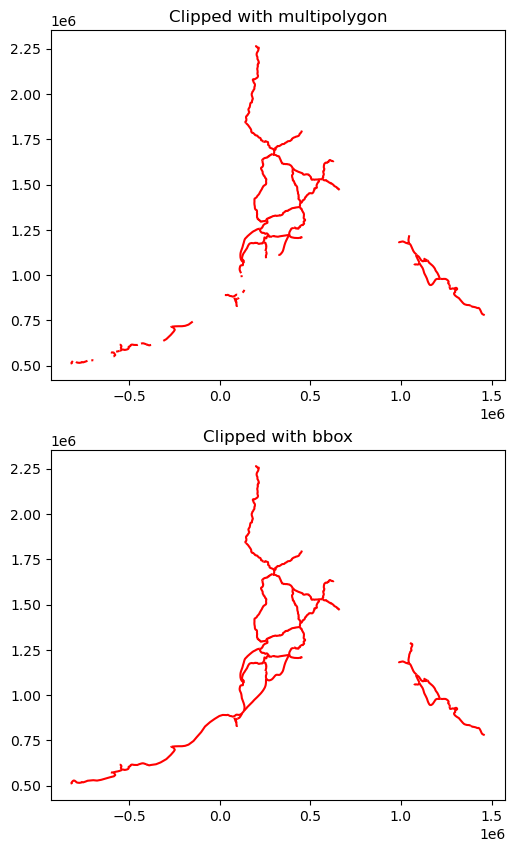

In [61]:

fig, (ax1,ax2) = plt.subplots(2,1, figsize = (10,10))

ak_roads.plot(ax=ax1, color='red')
ax1.set_title('Clipped with multipolygon')

ak_complete_roads.plot(ax=ax2, color='red')
ax2.set_title('Clipped with bbox')

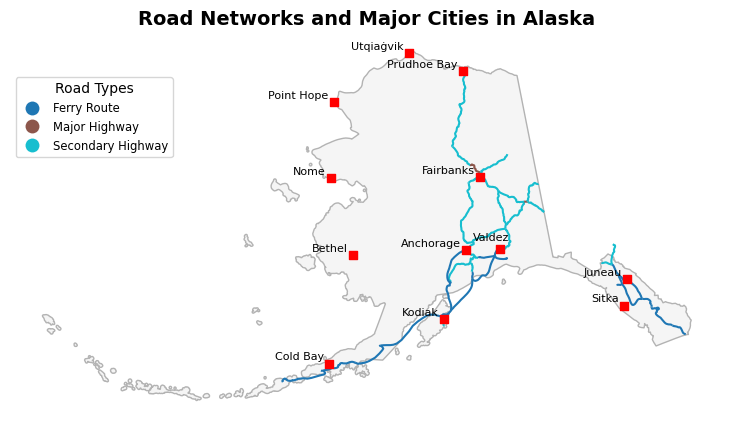

In [79]:
fig, ax = plt.subplots(figsize=(11,5))
ax.axis('off')

alaska.plot(ax=ax, color='whitesmoke', edgecolor='0.7')

ak_complete_roads.plot(ax=ax, 
                       zorder=1,  # Specify layer plotting order
                       column='type', 
                       legend=True,
                       legend_kwds={'title': "Road Types", 
                                    'loc': 'upper left',
                                    'bbox_to_anchor':(0,0.9),
                                    'fontsize':'small'}
                                    )

ak_places.plot(ax=ax, 
               zorder=2,  # Specify layer plotting order
               color='red', 
               marker='s'  # Square marker
               )
# Add city names as text annotations
for x, y, name in zip(ak_places.geometry.x, ak_places.geometry.y, ak_places['name']):
    if name == 'Valdez':
        ax.text(x+55000, y+45000, name, fontsize=8, ha='right')
    else: 
        ax.text(x-30000, y+20000, name, fontsize=8, ha='right')

ax.set_title("Road Networks and Major Cities in Alaska", fontsize=14, fontweight='bold')

plt.show()